In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

In [4]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 3

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 5
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 7
    
    return model

In [5]:
## model_1 :model number 1
## model_2 :model number 2
## model_3 :model number 3

In [6]:
model_1 = select_model(1)

In [7]:
model_2 = select_model(2)

In [8]:
model_3 = select_model(3)

In [9]:
model_1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
model_3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [12]:
model_1.fit(train_images, train_labels,  epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.5100 - accuracy: 0.9444
Epoch 2/5
60000/60000 [==============================] - 8s 142us/sample - loss: 0.0830 - accuracy: 0.9753
Epoch 3/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0667 - accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0630 - accuracy: 0.9805
Epoch 5/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0537 - accuracy: 0.9844


In [13]:
model_2.fit(train_images, train_labels,  epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 245us/sample - loss: 0.4161 - accuracy: 0.9426
Epoch 2/5
60000/60000 [==============================] - 14s 236us/sample - loss: 0.0730 - accuracy: 0.9784
Epoch 3/5
60000/60000 [==============================] - 14s 236us/sample - loss: 0.0589 - accuracy: 0.9828
Epoch 4/5
60000/60000 [==============================] - 14s 233us/sample - loss: 0.0493 - accuracy: 0.9849
Epoch 5/5
60000/60000 [==============================] - 14s 233us/sample - loss: 0.0424 - accuracy: 0.9865


In [14]:
model_3.fit(train_images, train_labels,  epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 393us/sample - loss: 0.1728 - accuracy: 0.9577
Epoch 2/5
60000/60000 [==============================] - 24s 395us/sample - loss: 0.0542 - accuracy: 0.9827
Epoch 3/5
60000/60000 [==============================] - 23s 391us/sample - loss: 0.0411 - accuracy: 0.9876
Epoch 4/5
60000/60000 [==============================] - 24s 395us/sample - loss: 0.0369 - accuracy: 0.9887
Epoch 5/5
60000/60000 [==============================] - 24s 396us/sample - loss: 0.0330 - accuracy: 0.9905


In [15]:
test_loss, accuracy = model_1.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

10000/1 - 1s - loss: 0.0651 - accuracy: 0.9722

Test loss :  0.12877259273726813
Test accuracy : 0.9722


In [16]:
test_loss, accuracy = model_2.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

10000/1 - 1s - loss: 0.0285 - accuracy: 0.9861

Test loss :  0.05172190898502886
Test accuracy : 0.9861


In [17]:
test_loss, accuracy = model_3.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

10000/1 - 1s - loss: 0.0197 - accuracy: 0.9886

Test loss :  0.03857875017699625
Test accuracy : 0.9886


In [18]:
test_images = tf.cast(test_images, tf.float32)
pred_1 = model_1.predict(test_images)
pred_2 = model_2.predict(test_images)
pred_3 = model_1.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [20]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

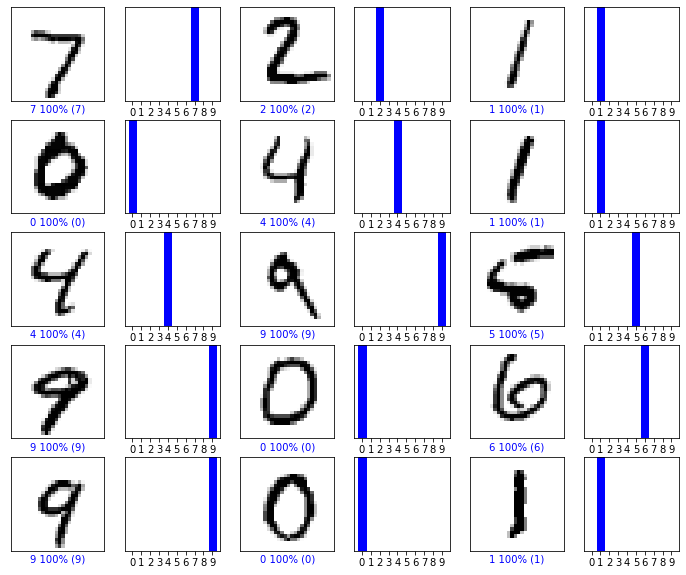

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred_1, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred_1, test_labels)
plt.show()

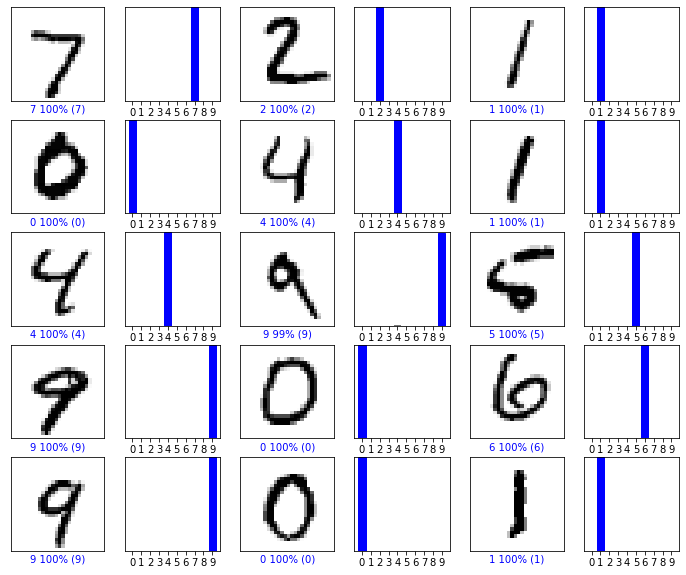

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred_2, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred_2, test_labels)
plt.show()

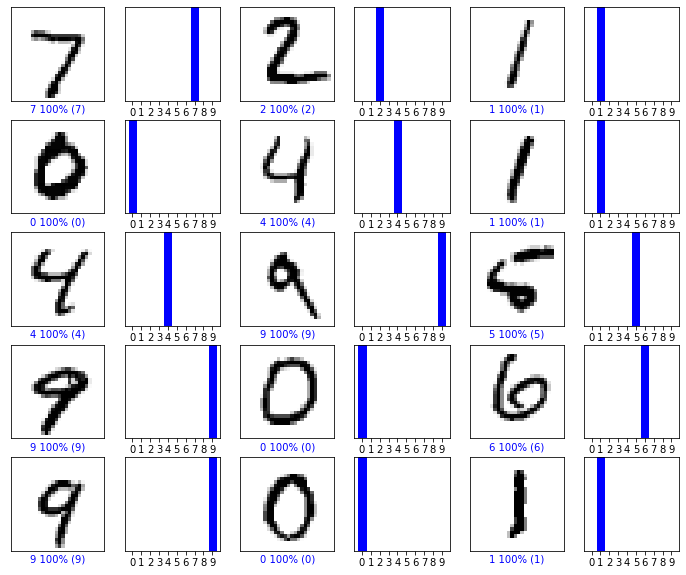

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred_3, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred_3, test_labels)
plt.show()

In [24]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

In [25]:
index_1 = error_mnist(pred_1, test_labels)
index_slice_1 = index_1[:10]
print(index_1[:10])

[151, 175, 211, 247, 259, 266, 321, 381, 445, 460]


In [26]:
index_2 = error_mnist(pred_2, test_labels)
index_slice_2 = index_2[:10]
print(index_2[:10])

[18, 62, 160, 184, 193, 259, 320, 321, 449, 583]


In [27]:
index_3 = error_mnist(pred_3, test_labels)
index_slice_3 = index_3[:10]
print(index_3[:10])

[151, 175, 211, 247, 259, 266, 321, 381, 445, 460]


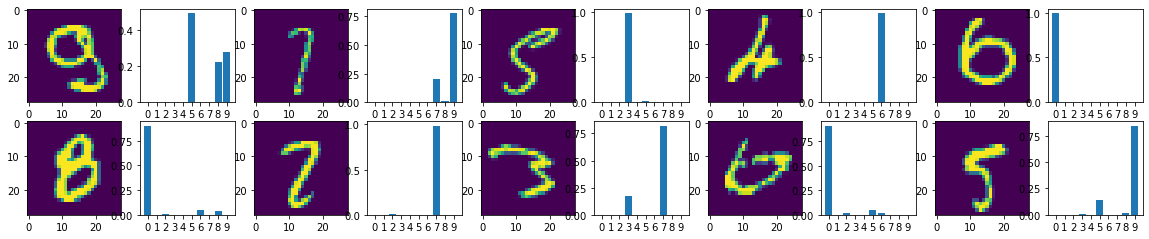

In [28]:
plot_error(index_slice_1, pred_1, test_labels)

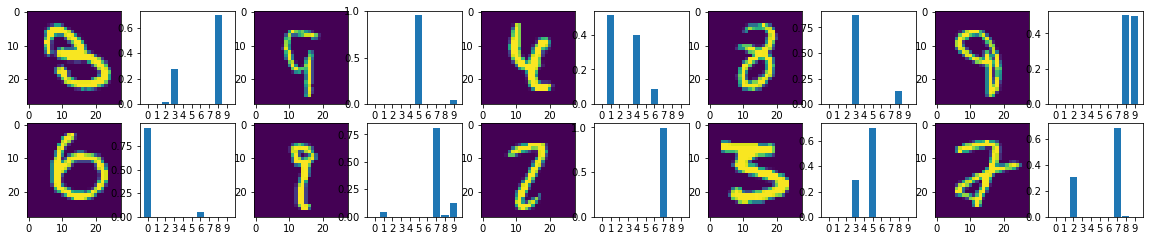

In [29]:
plot_error(index_slice_2, pred_2, test_labels)

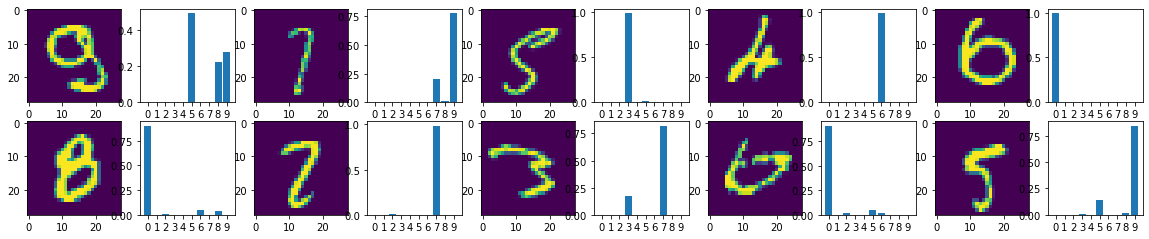

In [30]:
plot_error(index_slice_3, pred_3, test_labels)

In [ ]:
##DONE